# importing neccessary lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

importing data from csv

In [2]:
df = pd.read_csv("C:\\Users\\Pavani\\Downloads\\ecommerce_dataset_with_nulls.csv")

In [3]:
df.shape

(1000, 10)

In [4]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Product', 'Category',
       'Region', 'Quantity', 'Unit Price', 'Total Price', 'Order Status'],
      dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of      Order ID  Order Date   Customer Name     Product     Category Region  \
0    ORD00001  2023-02-12     Dylan Davis  Smartphone  Electronics    NaN   
1    ORD00002  2023-11-15    Henry Thomas  Headphones  Electronics  South   
2    ORD00003  2023-02-22   Lauren Wilson  Headphones  Electronics    NaN   
3    ORD00004  2023-12-12  Andrew Shields      Laptop  Electronics   East   
4    ORD00005         NaN    David Newton    Backpack  Accessories   West   
..        ...         ...             ...         ...          ...    ...   
995  ORD00996  2023-12-08     Kevin Cross     T-Shirt      Apparel  South   
996  ORD00997  2023-03-11  Sarah Guerrero      Laptop  Electronics    NaN   
997  ORD00998  2023-04-26     Harry James         NaN      Apparel   East   
998  ORD00999  2023-04-14     John Garcia      Laptop  Electronics   East   
999  ORD01000  2023-05-29      Maria Gill  Headphones  Electronics  South   

     Quantity  Unit Price  Total Price Or

In [6]:
df.dropna(inplace = True)

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [8]:
df['Month'] = df['Order Date'].dt.month

In [9]:
df['Revenue'] = df['Quantity'] * df['Unit Price']

In [10]:
df['Quantity'].value_counts

<bound method IndexOpsMixin.value_counts of 10     4.0
23     1.0
29     1.0
30     4.0
31     5.0
      ... 
978    5.0
979    1.0
988    5.0
990    5.0
999    4.0
Name: Quantity, Length: 245, dtype: float64>

In [11]:
monthly_totals = df.groupby('Month')['Quantity'].sum()

In [21]:
top_selling_products = df.groupby('Category')['Unit Price'].sum()
top_selling_products = top_selling_products.sort_values(ascending = False)
print(top_selling_products)
categories = top_selling_products.index.tolist()
values = top_selling_products.values.tolist()

Category
Electronics    161018.0
Accessories     95690.0
Apparel         69894.0
Footwear        58731.0
Name: Unit Price, dtype: float64


#Bar Chart: Total sales per product category

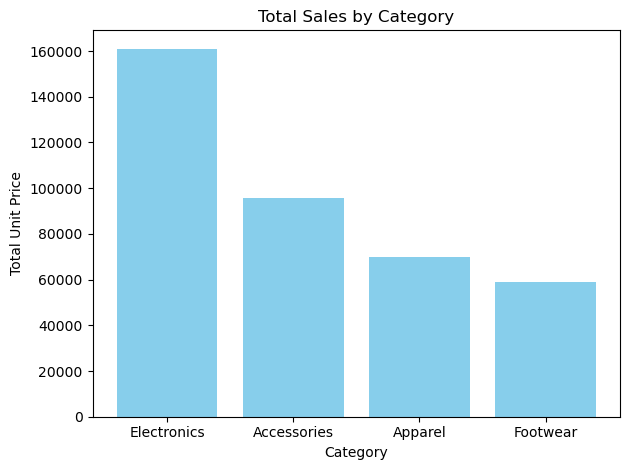

In [22]:

x = categories
y = values

plt.bar(x, y, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Unit Price')
plt.title('Total Sales by Category')
plt.tight_layout()
plt.show()


In [13]:
# Get unique months
unique_months = df['Month'].unique()

# Sort the months (optional)
unique_months = sorted(unique_months)

print(unique_months)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Line Plot: Revenue over time (monthly)

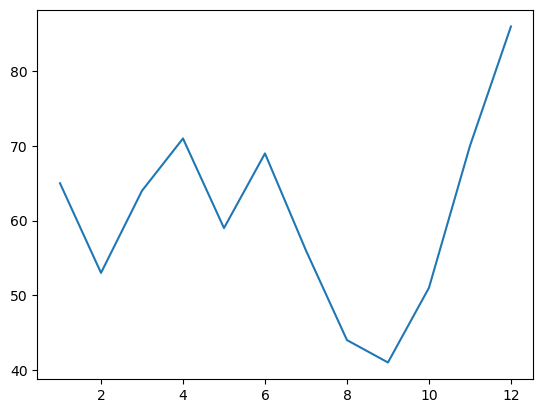

In [14]:
months = df['Month'].index.tolist()
y = monthly_totals
x = unique_months
plt.plot(x,y)

In [15]:

#Pie Chart: Order distribution by region


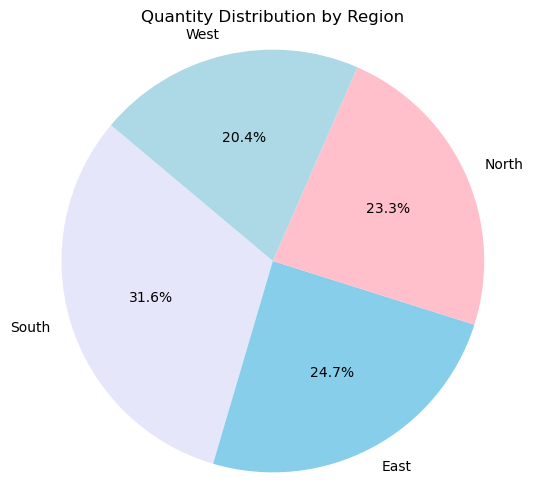

In [16]:
# 1. Group and sum quantities by region
region_quantity = df.groupby('Region')['Quantity'].sum()

# 2. Sort the result in descending order (still a Series)
region_quantity = region_quantity.sort_values(ascending=False)

# 3. Convert values and labels to lists
quantities = region_quantity.values.tolist()
regions = region_quantity.index.tolist()

plt.figure(figsize=(6,6))
plt.pie(
    quantities,
    labels=regions,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lavender', 'skyblue', 'pink', 'lightblue']  # must match number of regions
)
plt.title('Quantity Distribution by Region')
plt.axis('equal')  # Ensures the pie is round
plt.show()

Horizontal Bar Chart: Most ordered products

Text(0.5, 1.0, 'Most ordered products')

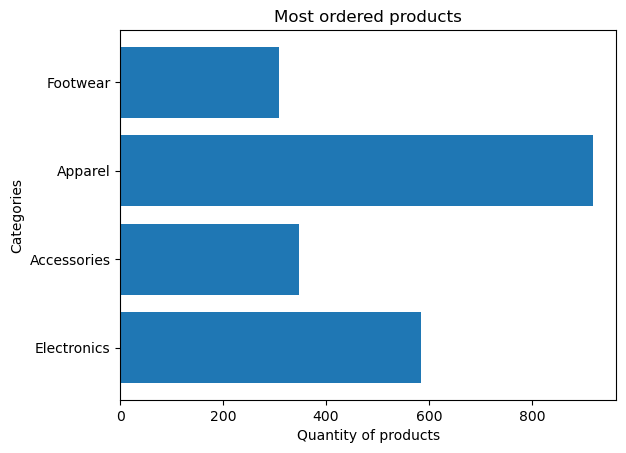

In [24]:
products_quant = df.groupby('Category')['Quantity'].sum()
products_quant = products_quant.values.tolist()
products_quant
x = categories
y = products_quant
plt.barh(x,y)
plt.xlabel('Quantity of products')
plt.ylabel('Categories')
plt.title('Most ordered products')

In [18]:
df = pd.read_csv("C:\\Users\\Pavani\\Downloads\\ecommerce_dataset_with_nulls.csv")
missing_counts = df.isnull().sum()
print(missing_counts)


Order ID         138
Order Date       146
Customer Name    133
Product          143
Category         141
Region           134
Quantity         140
Unit Price       137
Total Price      132
Order Status     131
dtype: int64


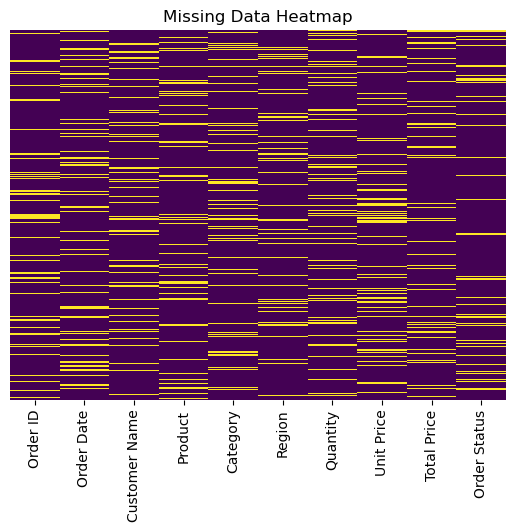

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()